# Load & Explore data

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing

In [42]:
path_file = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(path_file)
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [43]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [44]:
# A few features that might be indicative of CO2 emission
co2_df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
co2_df.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


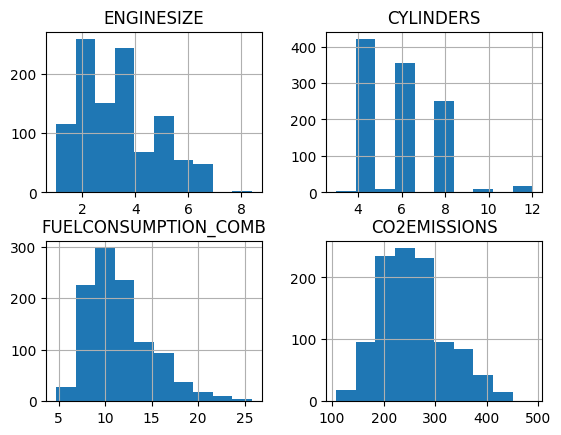

In [45]:
# Visualize
co2_df.hist()
plt.show()
# -> most engines have 4/ 6/ 8 cylinders, engine sizes between 2 and 4 liters
# -> combined fuel consumption and CO2 emission have very similar distributions.

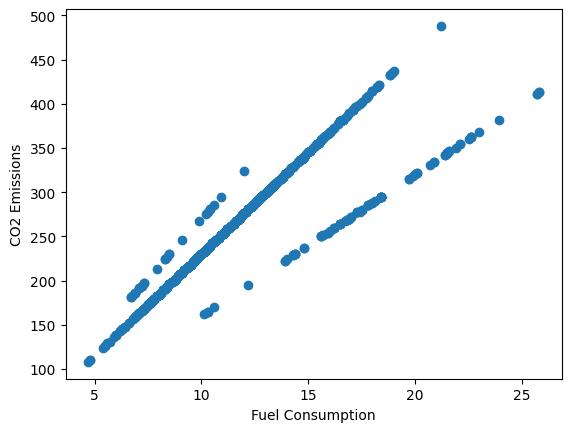

In [46]:
# fuel - CO2
plt.scatter(x=co2_df['FUELCONSUMPTION_COMB'], y=co2_df['CO2EMISSIONS'])
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()
# 3 car groups each have a strong linear relationship

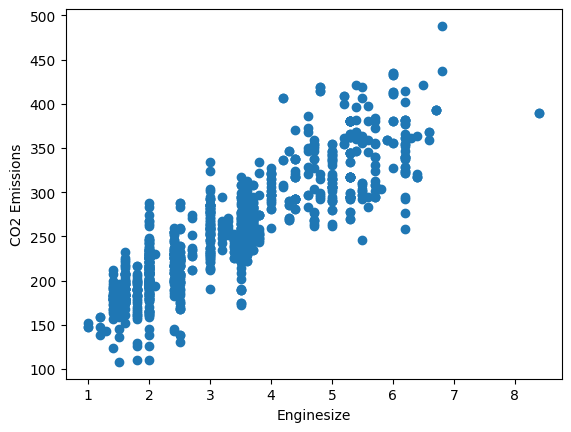

In [69]:
# enginesize - CO2
plt.scatter(x=co2_df.ENGINESIZE, y=co2_df.CO2EMISSIONS)
plt.xlabel('Enginesize')
plt.ylabel('CO2 Emissions')
# plt.xlim(0,30)
plt.show()
# quite linear, correlation is weaker

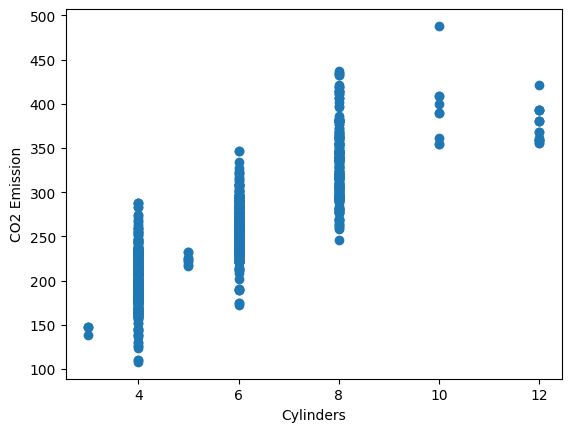

In [48]:
# Cylinder - CO2
plt.scatter(x=co2_df.CYLINDERS, y=co2_df.CO2EMISSIONS)
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission')
plt.show()

# Simple Linear Regression

In [65]:
# (ENGINESIZE - CO2EMISSIONS)
X = co2_df.ENGINESIZE.to_numpy() # X = co2_df[['ENGINESIZE']]
y = co2_df.CO2EMISSIONS.to_numpy() # y = co2_df[['CO2EMISSIONS']]

# train & test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
slr = linear_model.LinearRegression()
slr.fit(X_train.reshape(-1, 1), y_train) # slr.fit(X_train, y_train)
slr.coef_
slr.intercept_

np.float64(126.28970217408721)

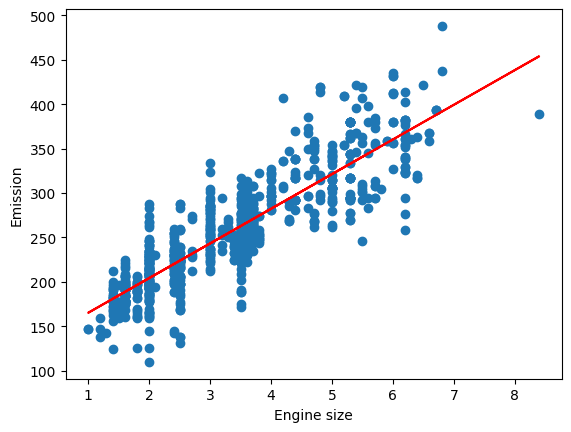

In [70]:
# Visualize model outputs
plt.scatter(X_train, y_train)
plt.plot(X_train, slr.coef_*X_train + slr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [80]:
# Model evaluation
# MAE, MSE, RMSE, R^2
y_hat_test = slr.predict(X_test.reshape(-1, 1))
mean_absolute_error(y_test, y_hat_test) # 24.1
mean_squared_error(y_test, y_hat_test) # 985.9
np.sqrt(mean_squared_error(y_test, y_hat_test)) # 31.4
r2_score(y_test, y_hat_test) # 0.76

0.7615595731934373

# Multiple Regression

In [92]:
# 1. Explore and select features
# multiple linear regression model
# using some of features to predict CO2 emissions
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [93]:
# drop some variables - not related to CO2 emissions
df_new = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)
df_new.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [91]:
# correlation
df_new.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [95]:
# Tránh vấn đề đa cộng tuyến (multicollinearity) -> drop more
# ENGINESIZE, CYLINDERS - highly correlated, but ENGINESIZE is more correlated with CO2EMISSIONS -> drop CYLINDERS
# FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB - highly correlated
# FUELCONSUMPTION_COMB_MPG - most correlated with CO2EMISSIONS
new_co2_df = df_new.drop(['CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',], axis=1)
new_co2_df.head()
new_co2_df.corr()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,-0.808554,0.874154
FUELCONSUMPTION_COMB_MPG,-0.808554,1.000000,-0.906394
CO2EMISSIONS,0.874154,-0.906394,1.000000


In [101]:
# 2. Extract and Preprocess
X = new_co2_df.iloc[:,[0,1]].to_numpy() # chọn các cột ở vị trí chỉ mục 0 và 1 (ENGINESIZE, FUELCONSUMPTION_COMB_MPG)
y = new_co2_df.iloc[:,[2]].to_numpy()

In [103]:
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)
X_std

array([[-0.9512918 ,  0.87855306],
       [-0.66865251,  0.34273362],
       [-1.30459092,  2.88787597],
       ...,
       [-0.24469358, -0.32704069],
       [-0.10337393, -0.19308583],
       [-0.10337393, -0.59495041]])

In [104]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [105]:
# 3. Build a multiple linear regression model
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

In [114]:
mlr = linear_model.LinearRegression()
mlr.fit(X_train, y_train)
coef_ =  mlr.coef_
intercept_ = mlr.intercept_

print ('coef: ', coef_)
print ('intercept: ', intercept_)

coef:  [[ 25.27339614 -37.4381472 ]]
intercept:  [256.29072488]


In [115]:
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


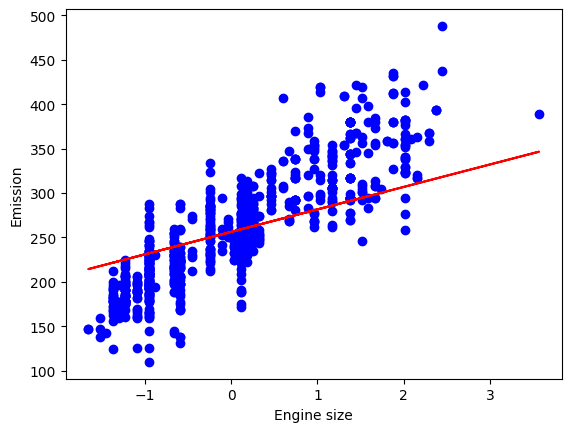

In [119]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

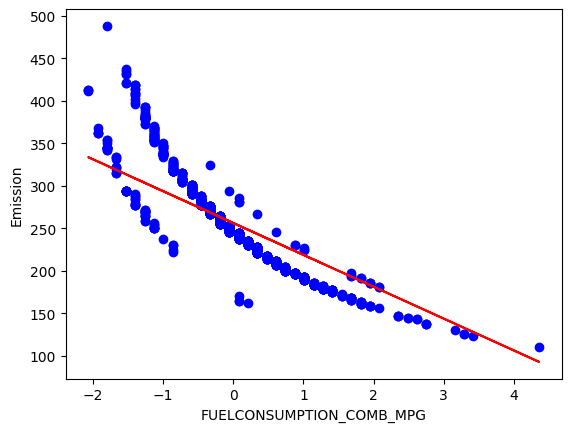

In [120]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

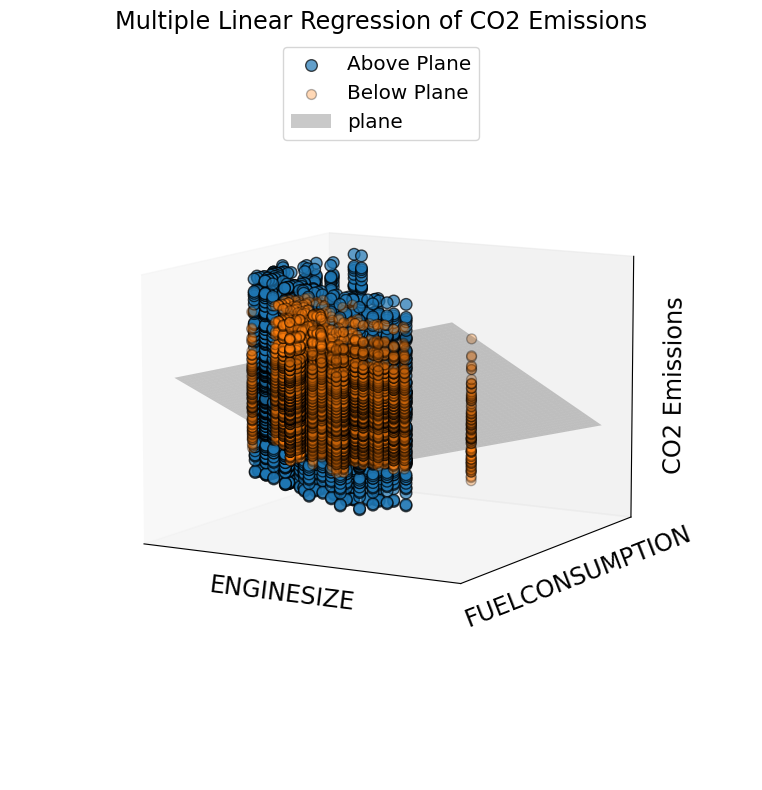

In [121]:
# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = mlr.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else mlr.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()


# New Section